In [ ]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$         INITIAL SETTINGS - НАЧАЛЬНЫЕ УСТАНОВКИ          $$$$$$$$$$$$$$$$$$$$$$$$$$$$
# SEARCH --- GOOGLE

In [47]:
# Pandas
import pandas as pd
import numpy as np

In [48]:
# Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
# Date & Time
from datetime import datetime

In [50]:
# Установка, чтобы показывались все имеющиеся столбцы
pd.options.display.max_columns = None

In [51]:
# Посмотреть текущую дату:
print(datetime.today())

# Посмотреть текущую дату:
print(datetime.now().date())

2022-02-18 11:55:58.931142
2022-02-18


In [52]:
# Посмотреть текущее время:
date_now = datetime.today()
print(date_now.strftime('%H:%M:%S'))
print(datetime.today().strftime('%H:%M:%S'))

11:56:05
11:56:05


In [ ]:
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@          GROUP_GOOGLE          @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [250]:
# Отчет о группе объявлений
otchet = pd.read_csv('C:/Users/Андрей/Downloads/otchet.csv', skiprows=2, sep=',')

In [251]:
otchet.head(3)

,Статус группы объявлений,Группа объявлений,Кампания,Статус,Причины статуса,Код валюты,Макс. цена за клик по умолчанию,Тип группы объявлений,Kлики,Показы,CTR,Код валюты.1,Средняя цена за клик,Расходы,Конверсии,Стоимость/конв.,Коэфф. конверсии
0,Включено,Рубероид,Спектр - Стройматериалы - Поиск,Допущено,NaN,RUB,"1,00",Стандартная,0,2,"0,00%",RUB,--,"0,00","0,00","0,00","0,00%"
1,Включено,Пол,Спектр - Пиломатериалы - Поиск,Допущено,NaN,RUB,"1,00",Стандартная,0,1,"0,00%",RUB,--,"0,00","0,00","0,00","0,00%"
2,Включено,Уголок,Спектр - Пиломатериалы - Поиск,Допущено,NaN,RUB,"1,00",Стандартная,0,2,"0,00%",RUB,--,"0,00","0,00","0,00","0,00%"


In [252]:
otchet.shape

(31, 17)

In [253]:
otchet.dtypes

Статус группы объявлений           object
Группа объявлений                  object
Кампания                           object
Статус                             object
Причины статуса                    object
Код валюты                         object
Макс. цена за клик по умолчанию    object
Тип группы объявлений              object
Kлики                               int64
Показы                              int64
CTR                                object
Код валюты.1                       object
Средняя цена за клик               object
Расходы                            object
Конверсии                          object
Стоимость/конв.                    object
Коэфф. конверсии                   object
dtype: object

In [ ]:
# Сохраняем в переменную путь для скачивания файла
group_google_file = 'C:/Users/Андрей/Downloads/otchet.csv'

In [ ]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$          FUNCTION SEARCH          $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# Функция считывает файл, переименовывает колонки, считает суммы, сохраняет результат в новый файл.
def group_report(file_path):
    df = pd.read_csv(file_path, skiprows=2, sep=',')
    df = df \
    .iloc[:, [1, 2, 9, 8, 13, 14, 16]] \
    .rename(columns={'Группа объявлений': 'group',
                    'Кампания': 'campaign',
                    'Показы': 'shows',
                    'Kлики': 'click',
                    'Расходы': 'expense',
                    'Конверсии': 'conversion',
                    'Коэфф. конверсии': 'conversion_percent'})
#     .replace('-', 0)
    
    
#     df['condition'] = df['condition'].apply(lambda x: x.split(' -')[0])
#     df.loc[:, 'ctr':'price'] = df.loc[:, 'ctr':'price'].replace(',','.', regex=True).astype(float)
    df[['conversion', 'expense']] = df[['conversion', 'expense']].replace(',','.', regex=True).astype(float)
    
#     df[['shows', 'click', 'conversion']] = df[['shows', 'click', 'conversion']].astype(str).astype(int)

#     .replace('Спектр - Пиломатериалы - Поиск', 'Пиломатериалы') \
#     .replace('Спектр - Стройматериалы - Поиск', 'Стройматериалы') \
#     .replace('Спектр - Услуги - Поиск', 'Услуги') \
#     .replace('Спектр - Лестницы - Поиск', 'Лестницы')
    
#     df['campaign'] = df['campaign'].astype(str)
#     df['campaign'] = df['campaign'].apply(lambda x: x.split(' - ')[1])
    
    
    return df

In [ ]:
group_google = group_report(group_google_file)

In [ ]:
group_google.isnull().sum()

In [ ]:
group_google.dropna()

In [ ]:
group_google.dropna()

In [ ]:
group_google \
.dropna() \
.sort_values('shows', ascending=False) \
.head(20)

In [ ]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$          SEARCH_GOOGLE          $$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [254]:
# Отчет о поисковых запросах
search_google_file = pd.read_csv('C:/Users/Андрей/Downloads/search_google.csv', skiprows=2, sep=',')

In [255]:
search_google_file.head(3)

,Поисковый запрос,Тип соответствия,Добавленные/Исключенные,Кампания,Группа объявлений,Kлики,Показы,CTR,Код валюты,Средняя цена за клик,Расходы,Конверсии,Стоимость/конв.,Коэфф. конверсии,Тип кампании
0,баня сруб цена,Широкое соответствие,Не используется,Спектр - Услуги - Поиск,Срубы,0,1,"0,00%",RUB,--,"0,00","0,00","0,00","0,00%",Поиск
1,прайс лист строительных работ по вологодской о...,Широкое соответствие,Не используется,Спектр - Услуги - Поиск,Услуги,0,2,"0,00%",RUB,--,"0,00","0,00","0,00","0,00%",Поиск
2,стоимость сруба 6 на 6,Широкое соответствие,Не используется,Спектр - Услуги - Поиск,Срубы,0,1,"0,00%",RUB,--,"0,00","0,00","0,00","0,00%",Поиск


In [256]:
search_google_file.shape

(190, 15)

In [257]:
search_google_file.dtypes

Поисковый запрос           object
Тип соответствия           object
Добавленные/Исключенные    object
Кампания                   object
Группа объявлений          object
Kлики                       int64
Показы                      int64
CTR                        object
Код валюты                 object
Средняя цена за клик       object
Расходы                    object
Конверсии                  object
Стоимость/конв.            object
Коэфф. конверсии           object
Тип кампании               object
dtype: object

In [215]:
# Сохраняем в переменную путь для скачивания файла
search_google_file = 'C:/Users/Андрей/Downloads/search_google.csv'

In [228]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$          FUNCTION SEARCH          $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# Функция считывает файл, переименовывает колонки, считает суммы, сохраняет результат в новый файл.
def search_report(file_path):
    df = pd.read_csv(file_path, skiprows=2, sep=',')
    df = df \
    .iloc[:, [4, 0, 6, 5, 7, 9, 10, 11]] \
    .rename(columns={'Группа объявлений': 'group',
                    'Поисковый запрос': 'search_query',
                    'Показы': 'shows',
                    'Kлики': 'click',
                    'CTR': 'ctr',
                    'Средняя цена за клик': 'click_average',
                    'Расходы': 'expense',
                    'Конверсии': 'conversion'}) \
    .dropna() \
    .replace(' --', 0) \
    .sort_values('shows', ascending=False)
    
    
#     df['condition'] = df['condition'].apply(lambda x: x.split(' -')[0])
#     df.loc[:, 'ctr':'price'] = df.loc[:, 'ctr':'price'].replace(',','.', regex=True).astype(float)
    df[['conversion', 'expense', 'click_average']] = df[['conversion', 'expense', 'click_average']].replace(',','.', regex=True).astype(float)
    
#     df[['shows', 'click', 'conversion']] = df[['shows', 'click', 'conversion']].astype(str).astype(int)

    
#     df['campaign'] = df['campaign'].astype(str)
#     df['campaign'] = df['campaign'].apply(lambda x: x.split(' - ')[1])
    
    
    return df

In [229]:
search_google = search_report(search_google_file)

In [226]:
search_google[['search_query']] == 'Итого' + *")

SyntaxError: invalid syntax (<unknown>, line 1)

In [233]:
search_google.head()

,group,search_query,shows,click,ctr,click_average,expense,conversion
14,Срубы,дом из бруса 8 на 8 двухэтажный,5,0,"0,00%",0.0,0.0,0.0
74,Срубы,срубы бань вологодская область,3,0,"0,00%",0.0,0.0,0.0
26,Лестницы,лестница на второй этаж,3,0,"0,00%",0.0,0.0,0.0
17,Услуги,строительная бригада волгоград,2,0,"0,00%",0.0,0.0,0.0
75,Срубы,купить сруб тюмень,2,0,"0,00%",0.0,0.0,0.0


In [234]:
search_google.tail()

,group,search_query,shows,click,ctr,click_average,expense,conversion
38,Лестницы,винтовая лестница,1,0,"0,00%",0.0,0.0,0.0
37,Срубы,кировские срубы под ключ,1,0,"0,00%",0.0,0.0,0.0
36,Срубы,купить баню 6 на 6,1,1,"100,00%",12.9,12.9,0.0
34,Заборы,современные материалы для забора,1,0,"0,00%",0.0,0.0,0.0
105,Срубы,купить сруб в архангельской области,1,0,"0,00%",0.0,0.0,0.0


In [232]:
search_google.search_query.unique()

array(['дом из бруса 8 на 8 двухэтажный',
       'срубы бань вологодская область', 'лестница на второй этаж',
       'строительная бригада волгоград', 'купить сруб тюмень',
       'срубы из вологды без посредников', 'самый дешевый забор из чего',
       'лестницы на второй этаж', 'забор киров',
       'дом из бревна одноэтажный', 'срубы бань',
       'купить сруб в вологодской области',
       'купить сруб бани в кировской области',
       'срубы вологодская область', 'купить баню', 'купить забор',
       'сруб для бани цена',
       'прайс лист строительных работ по вологодской области',
       'проекты домов из бруса', 'купить сруб дома в вологодской области',
       'красивые бани с мансардой', 'лестница деревянная с поворотом',
       'профнастил на забор цена ижевск',
       'строительство фундамента для дома', 'дикий сруб бани',
       'строительство деревянных домов вологодская область',
       'купить лестницу на второй этаж', 'расценки на ремонт квартир',
       'лестницы киро

In [170]:
# search_google.isnull().sum()

In [169]:
# search_google_file.dropna()

In [168]:
# search_google_file \
# .dropna() \
# .sort_values('shows', ascending=False) \
# .head(20)

In [191]:
search_google.dtypes

group             object
search_query      object
shows              int64
click              int64
ctr               object
click_average    float64
expense          float64
conversion       float64
dtype: object

In [ ]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$          SPECIFICATIONS          $$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [167]:
print('search_google.shape - ', search_google.shape)

search_google.shape -  (172, 8)


In [171]:
search_google.columns

Index(['group', 'search_query', 'shows', 'click', 'ctr', 'click_average',
       'expense', 'conversion'],
      dtype='object')

In [172]:
search_google.query("group == 'Срубы'")

,group,search_query,shows,click,ctr,click_average,expense,conversion
139,Срубы,дом из бруса 8 на 8 двухэтажный,4,0,"0,00%",0.00,0.00,0.0
156,Срубы,срубы бань вологодская область,3,0,"0,00%",0.00,0.00,0.0
143,Срубы,срубы из вологды без посредников,2,2,"100,00%",10.34,20.68,0.0
86,Срубы,срубы вологодская область,2,0,"0,00%",0.00,0.00,0.0
54,Срубы,сруб для бани цена,2,0,"0,00%",0.00,0.00,0.0
61,Срубы,дом из бревна одноэтажный,2,0,"0,00%",0.00,0.00,0.0
48,Срубы,купить сруб бани в кировской области,2,0,"0,00%",0.00,0.00,0.0
118,Срубы,купить баню,2,0,"0,00%",0.00,0.00,0.0
161,Срубы,купить сруб тюмень,2,0,"0,00%",0.00,0.00,0.0
4,Срубы,срубы бань,2,2,"100,00%",12.78,25.55,0.0


In [7]:
search.tail()

,date,search_query,campaign,group,number_ad,condition,phrase,platform,category,shows,...,ctr,expense,average_cost_click,average_position_show,average_position_click,refusals,depth,conversion_percent,price,conversion
195,13.12.2021,материал важный в строительстве,Стройматериалы,Стройматериалы,M-11425986762,стройматериалы,материал строительство -магазин -купить -сайт...,Яндекс,не определена,1,...,"0,00","0,00",0,"5,00",0,0,0,0,0,0
196,13.12.2021,резные доски наличники деревянные,Пиломатериалы,Наличник,M-11430797630,наличник деревянный,0,Яндекс,Целевые запросы,1,...,"0,00","0,00",0,"6,00",0,0,0,0,0,0
197,13.12.2021,резные доски наличники деревянные,Пиломатериалы,Наличник,M-11430797631,наличник деревянный,0,Яндекс,не определена,1,...,"0,00","0,00",0,"7,00",0,0,0,0,0,0
198,13.12.2021,стройбаза сыктывкар,Стройматериалы,Стройматериалы,M-11425986761,магазин стройматериалов,0,Яндекс,Запросы с упоминанием конкурентов,1,...,"0,00","0,00",0,"7,00",0,0,0,0,0,0
199,13.12.2021,шпаклевка шитрок аналоги,Стройматериалы,Стройматериалы,M-11425986761,стройматериалы,0,Яндекс,Целевые запросы,1,...,"0,00","0,00",0,"5,00",0,0,0,0,0,0


In [173]:
search_google.conversion.unique()

array([0., 1.])

In [174]:
# Подсчёт количества показов и кликов и конверсий
print('search_google.shows.sum (Количество показов) - ', search_google.shows.sum())
print('search_google.click.sum (Количество кликов) - ', search_google.click.sum())
print('search_google.conversion.sum (Количество конверсий) - ', search_google.conversion.sum())

search_google.shows.sum (Количество показов) -  207
search_google.click.sum (Количество кликов) -  22
search_google.conversion.sum (Количество конверсий) -  1.0


In [ ]:
# &&&&&&&&&&&&&&&&&&&&&&&&&&&&          ANALYTICS          &&&&&&&&&&&&&&&&&&&&&&&&&&&&

In [182]:
# Количество уникальных запросов
search_google \
    .query("group == 'Срубы'") \
    .shows \
    .count()

60

In [183]:
# Количество уникальных запросов
search_google \
    .query("group == 'Срубы'") \
    .search_query \
    .nunique()

60

In [180]:
# Общее количество запросов
search_google \
    .query("group == 'Срубы'") \
    .shows \
    .sum()

74

In [12]:
search.search_query.count()

1309

In [184]:
# Тексты уникальных запросов
search_google.query("group == 'Срубы'").search_query.unique()

array(['дом из бруса 8 на 8 двухэтажный',
       'срубы бань вологодская область',
       'срубы из вологды без посредников', 'срубы вологодская область',
       'сруб для бани цена', 'дом из бревна одноэтажный',
       'купить сруб бани в кировской области', 'купить баню',
       'купить сруб тюмень', 'срубы бань',
       'купить сруб в вологодской области',
       'дома из оцилиндрованного бревна вологодская область',
       'построить дом из бруса под ключ недорого в иркутске цены',
       'срубы бань тюмень', 'дом из бруса 8 на 8',
       'дома из толстого бревна', 'сруб бани в чашу', 'куб бревна цена',
       'бревенчатый дом', 'баня из оцилиндрованного бревна проект',
       'купить сруб дома в вологодской области', 'проекты домов из бруса',
       'красивые бани с мансардой', 'стоимость сруба 6 на 6',
       'проекты бань из бревна', 'баня сруб цена',
       'кировские срубы под ключ', 'готовые бани череповец',
       'купить баню 6 на 6', 'купить сруб дома не дорого',
       'о

In [19]:
search.query("group == 'Стройматериалы'").search_query

2                              салехард магазин строймир
5                                пеноплекс 100 мм купить
13                                 стропила тверь купить
14     купить монолитный поликарбонат от производител...
16                               волма слой 30 кг купить
                             ...                        
902         супердиффузионную гидроизоляционную мембрану
904      тд вимос кировск лен обл каталог товаров и цены
905            ту 5767 006 54349294 2014 пеноплекс стена
911                       цена на пиломатериалы на бирже
915                                     ярославль кирпич
Name: search_query, Length: 414, dtype: object

In [20]:
search.query("search_query == 'играть в шахматы купить сруб'").shows.count()

21

In [185]:
search_google.query("group == 'Срубы' & shows > 1").search_query

139         дом из бруса 8 на 8 двухэтажный
156          срубы бань вологодская область
143        срубы из вологды без посредников
86                срубы вологодская область
54                       сруб для бани цена
61                дом из бревна одноэтажный
48     купить сруб бани в кировской области
118                             купить баню
161                      купить сруб тюмень
4                                срубы бань
159       купить сруб в вологодской области
Name: search_query, dtype: object

In [22]:
# @@@@@@@@@@@@@@@@@@@@@@            ВЫБОРКА ПОКАЗОВ ДЛЯ ОПРЕДЕЛЕНИЯ МИНУС СЛОВ            @@@@@@@@@@@@@@@@@@@@@@

# Чтобы использовать переменные из текущего пространства имен, вы должны использовать символ @ перед именем переменной:
gruppa = 'Срубы'
print('Количество показов:', search.query("group == @gruppa").shows.sum())

Количество показов: 310


In [21]:
# @@@@@@@@@@@@@@@@@@@@@@            ВЫБОРКА ПОКАЗОВ ДЛЯ ОПРЕДЕЛЕНИЯ МИНУС СЛОВ            @@@@@@@@@@@@@@@@@@@@@@

gruppa = 'Срубы'
print('Группа:', gruppa)
print('Количество показов:', search.query("group == @gruppa").shows.sum())
print('Количество запросов:', search.query("group == @gruppa").search_query.count())
print('Количество уникальных запросов:', search.query("group == @gruppa").search_query.nunique())
print('Количество кликов:', search.query("group == @gruppa").click.sum())

Группа: Срубы
Количество показов: 310
Количество запросов: 277
Количество уникальных запросов: 179
Количество кликов: 36


In [23]:
print('Уникальные запросы по группе:', search.query("group == @gruppa").search_query.unique())

Уникальные запросы по группе: ['играть в шахматы купить сруб' 'купить сруб бани в архангельской области'
 'купить сруб бани из бревна недорого'
 'купить сруб бани из бревна недорого в архангельской области'
 'купить сруб бани из бревна недорого в емецке'
 'купить сруб бани из бревна недорого в холмогорский район'
 'купить сруб дома' 'купить сруб дома в архангельской области' 'сруб бани'
 'сруб бани 6х6 из бруса цена под ключ проекты и цены'
 'срубы бань в вилегодском' 'срубы из оцилиндрованного бревна'
 'купить готовый сруб дома' 'купить сруб бани'
 'сруб бани 3х4 из бревна цена' 'сруб бани из бревна с стропилами'
 'сруб дома из бруса проекты и цены'
 'сруб дома из бруса проекты и цены коми' 'сруб из бруса'
 'установка стропил на сруб из бревна' 'шипицыно срубы бань цена'
 'купить сруб бани в смоленске' 'полезная высота бревна 40 50 в срубе'
 'продаю сруб' 'сруб 3х6 из оцилиндрованного бревна'
 'сруб бани 5 на 2 5 в емецке стоимость' 'сруб бани 6 × 5 цена из бревна'
 'сруб бани купить'

In [68]:
unique_query = list(unique_query)

In [164]:
# print(sorted(unique_query))

In [ ]:
# Я хотел бы получить список имен, которые встречаются в столбце более одного раза. Как мне это сделать?
counts = df.groupby('name').size()
df2 = pd.DataFrame(counts, columns = ['size'])
df2 = df2[df2.size>1]

In [240]:
# Я хотел бы получить список имен, которые встречаются в столбце более одного раза. Как мне это сделать?
# counts = search.groupby('search_query').size()
# df2 = pd.DataFrame(counts, columns = ['size'])
# df2 = df2[df2.size>1]
# print(df2)

In [70]:
# Выборка всех повторов в поисковых запросах и их количество
names = search.query("group == 'Стекло'").search_query.value_counts()
names[names > 1]

купить стекло на опм                                3
где в архангельске можно заказать нарезку стекла    3
купить стекло для телевизора lg 43um7020plf         2
купить сенсорное стекло для хонор 10 лайт           2
стекла корень                                       2
купить стекло для керосиновых ламп                  2
купить стекло в онеге                               2
купить стекло на фару лк200 2012г                   2
разбилось стекло на лицо                            2
стекло для дрипки зевс                              2
стекло на обь м с калиткой купить                   2
пробники стекло 2мл                                 2
Name: search_query, dtype: int64

In [71]:
names.index[names > 1]

Index(['купить стекло на опм',
       'где в архангельске можно заказать нарезку стекла',
       'купить стекло для телевизора lg 43um7020plf',
       'купить сенсорное стекло для хонор 10 лайт', 'стекла корень',
       'купить стекло для керосиновых ламп', 'купить стекло в онеге',
       'купить стекло на фару лк200 2012г', 'разбилось стекло на лицо',
       'стекло для дрипки зевс', 'стекло на обь м с калиткой купить',
       'пробники стекло 2мл'],
      dtype='object')

In [268]:
# duplicateCheck = search.duplicated(subset=['Name', 'Date',], keep=False)

# print(search[duplicateCheck])

In [273]:
# duplicateCheck = search.duplicated(subset=['group', 'search_query'], keep=False)

# search[duplicateCheck]

In [259]:
# funcs_groups = search.query("group == 'Стекло'").search_query
# funcs_groups[(funcs_groups.count().search_query>1)]

In [274]:
# как найти дубликаты на основе значения столбца в pandas df.
df = pd.DataFrame({
    'ann_id': [1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2],
    'unique_id': ['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
                  'apple', 'apple', 'apple', 'mango', 'mango', 'mango',
                  'orange', 'orange', 'orange'],
    'start': [0, 2, 4, 6, 0, 2, 4, 60, 22, 44, 33, 77, 99, 11, 30, 50],
    'end': [1, 3, 5, 7, 1, 3, 5, 7, 33, 55, 66, 88, 89, 22, 40, 60]
})

output = df[df.duplicated(subset=['unique_id', 'start', 'end'], keep=False)]
print(output)

   ann_id unique_id  start  end
0       1     apple      0    1
1       1     apple      2    3
2       1     apple      4    5
4       2     apple      0    1
5       2     apple      2    3
6       2     apple      4    5


In [276]:
# output = search[search.duplicated(subset=['search_query', 'shows', 'click'], keep=False)]
# print(output)

In [278]:
# generate a table of those culprit rows which are duplicated:
dups = search.groupby(search.search_query.tolist()).size().reset_index().rename(columns={0:'count'})

# sum the final col of that table, and subtract the number of culprits:
dups['count'].sum() - dups.shape[0]

15

In [24]:
search.query("group == 'Срубы' & shows > 1").search_query

27                           играть в шахматы купить сруб
272                         стоимость сруба 6х8 из бревна
288                          играть в шахматы купить сруб
305     сруб дома 12х12 из бревна в чашу, купить в вел...
313     стоимость сборки сруба из готового оцилиндрова...
354                       купить сруб бани в красноборске
444              договор на заказ сруба из бревна скачать
488     срубы изготовление продажа строительство дачны...
489     срубы изготовление продажа строительство дачны...
506                          играть в шахматы купить сруб
507                     изготовление срубов бань под ключ
524     рубка сруба в теплый угол из из профилированно...
530     сруб дома из бревна 8х8 цена арх обл на 50 куб...
532                              сруб дома из бруса 1 ряд
749                        куплю́ сруб бани 3на3 в коноше
910                          играть в шахматы купить сруб
923                                             сруб бани
971           

In [236]:
# TABLE_1: Общее количество кликов по рекламе для каждой группы
group_active = search_google.groupby('group', as_index=False) \
    .agg({'click': 'sum'}) \
    .rename(columns={'click': 'sum_click'})# \

group_active

,group,sum_click
0,Заборы,1
1,Кровля,0
2,Лестницы,0
3,Резка стекла,0
4,Срубы,11
5,Услуги,1


In [237]:
# Общее количество кликов по рекламе:
group_active.sum_click.sum()

13

In [238]:
# TABLE_2: Общее количество конверсий для каждой группы
group_conversion = search_google.groupby('group', as_index=False) \
    .agg({'conversion': 'sum'}) \
    .rename(columns={'conversion': 'sum_conversion'})# \

group_conversion

,group,sum_conversion
0,Заборы,0.0
1,Кровля,0.0
2,Лестницы,0.0
3,Резка стекла,0.0
4,Срубы,1.0
5,Услуги,0.0


In [239]:
# Общее количество конверсий:
group_conversion.sum_conversion.sum()

1.0

In [240]:
# TABLE_3: Общее количество показов рекламы для каждой группы # с числом показов >= 1
group_popular = search_google.groupby('group', as_index=False) \
    .agg({'shows': 'sum'}) \
    .rename(columns={'shows': 'sum_shows'})# \
#    .query('count_shows > 1')

group_popular

,group,sum_shows
0,Заборы,16
1,Кровля,2
2,Лестницы,13
3,Резка стекла,1
4,Срубы,79
5,Услуги,18


In [241]:
# Общее количество показов рекламы:
group_popular.sum_shows.sum()

129

In [242]:
# TABLE_4: Количество уникальных запросов ПО ГРУППАМ ОБЪЯВЛЕНИЙ - "SEARCH"
lovely_query = search_google.groupby('group', as_index=False) \
    .agg({'search_query': pd.Series.nunique}) \
    .rename(columns={'search_query': 'unique_query'})# \

#lovely_query = search.query("group == 'Фанера'").search_query.unique()

lovely_query

,group,unique_query
0,Заборы,13
1,Кровля,2
2,Лестницы,10
3,Резка стекла,1
4,Срубы,64
5,Услуги,15


In [243]:
# Общее количество уникальных запросов:
lovely_query.unique_query.sum()

105

In [244]:
# TABLE_5: Количество показов рекламы ПО ПОПУЛЯРНЫМ ЗАПРОСАМ и самые популярные запросы по группам
lovely_query_count = search_google.groupby(['group', 'search_query'], as_index=False) \
    .agg({'shows': 'max'}) \
    .sort_values(['shows', 'group'], ascending=[False, True]) \
    .groupby('group') \
    .head(1) \
    .rename(columns={'search_query': 'popular_query','shows': 'count_popular_shows'})

lovely_query_count

,group,popular_query,count_popular_shows
42,Срубы,дом из бруса 8 на 8 двухэтажный,5
21,Лестницы,лестница на второй этаж,3
3,Заборы,забор киров,2
93,Услуги,прайс лист строительных работ по вологодской о...,2
13,Кровля,замена кровли крыши,1
25,Резка стекла,резка стекла йошкар ола,1


In [245]:
lovely_query_count.shape

(6, 3)

In [246]:
# Объединяем ПЯТЬ табличек: "lovely_query_count", "lovely_query", "group_popular", "group_active" и "group_conversion"
# в одну для дальнейшего анализа.
popular_query = group_popular \
    .merge(group_active, on='group', how='inner') \
    .merge(group_conversion, on='group', how='inner') \
    .merge(lovely_query, on='group', how='inner') \
    .merge(lovely_query_count, on='group', how='inner')

In [248]:
popular_query.sort_values('unique_query', ascending = False)

,group,sum_shows,sum_click,sum_conversion,unique_query,popular_query,count_popular_shows
4,Срубы,79,11,1.0,64,дом из бруса 8 на 8 двухэтажный,5
5,Услуги,18,1,0.0,15,прайс лист строительных работ по вологодской о...,2
0,Заборы,16,1,0.0,13,забор киров,2
2,Лестницы,13,0,0.0,10,лестница на второй этаж,3
1,Кровля,2,0,0.0,2,замена кровли крыши,1
3,Резка стекла,1,0,0.0,1,резка стекла йошкар ола,1


In [13]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$          FUNCTION MERGE          $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# Функция объединяет таблицы, переименовывает колонки, считает суммы, сохраняет результат в новый файл.
def merge_report(tab1, tab2):
#    df = tab1.merge(tab2, how = 'inner')
#    df = pd.merge(tab1, tab2, left_on ='date', right_on = 'group', how='left')
#    df = tab1.merge(tab2, on = ['date', 'group'])
#    df = pd.merge(tab1, tab2, on = ['date', 'group', 'condition'], how='inner')
    df = pd.merge(tab1, tab2, on = ['date', 'group', 'condition'], how='left')    
#    df = pd.merge(tab1, tab2, on = 'date')
#    df = tab1.join(tab2, lsuffix='_l', rsuffix='_r')
    
    columns_titles = ['date', 'search_query', 'condition',  'conversion_percent', 'price',
        'conversion', 'shows', 'shows_master', 'click', 'click_master', 'ctr', 'ctr_master', 'expense', 'campaign',
        'group', 'number_ad', 'region', 'device', 'gender',
        'category', 'average_cost_click', 'average_position_show', 'average_position_click', 'refusals', 'depth',
        'conversion_thanks', 'conversion_calls', 'conversion_wa', 'price_thanks', 'price_calls', 'price_wa', 
        'thanks', 'calls', 'wa', 'phrase', 'platform']
    report=df.reindex(columns=columns_titles)
    report['condition'] = report['condition'].apply(lambda x: x.split(' -')[0])
    report = report.replace('-', '0.00')
#    report['conversion'] = report['conversion'].astype(str).astype(int)
    
    report[['conversion_percent', 'price',
       'ctr', 'ctr_master', 'expense', 'average_cost_click',
       'average_position_show', 'average_position_click', 'refusals', 'depth',
       'conversion_thanks', 'conversion_calls', 'conversion_wa',
       'price_thanks', 'price_calls', 'price_wa']] = report[['conversion_percent', 'price',
       'ctr', 'ctr_master', 'expense', 'average_cost_click',
       'average_position_show', 'average_position_click', 'refusals', 'depth',
       'conversion_thanks', 'conversion_calls', 'conversion_wa',
       'price_thanks', 'price_calls', 'price_wa']].applymap(lambda x: float(str(x).replace(",",".")))
    
    report[['conversion_percent', 'price',
       'conversion', 'shows', 'shows_master', 'click', 'click_master', 'ctr',
       'ctr_master', 'expense', 'average_cost_click',
       'average_position_show', 'average_position_click', 'refusals', 'depth',
       'conversion_thanks', 'conversion_calls', 'conversion_wa',
       'price_thanks', 'price_calls', 'price_wa', 'thanks', 'calls', 'wa']] = report[['conversion_percent', 'price',
       'conversion', 'shows', 'shows_master', 'click', 'click_master', 'ctr',
       'ctr_master', 'expense', 'average_cost_click',
       'average_position_show', 'average_position_click', 'refusals', 'depth',
       'conversion_thanks', 'conversion_calls', 'conversion_wa',
       'price_thanks', 'price_calls', 'price_wa', 'thanks', 'calls', 'wa']].apply(pd.to_numeric, errors='ignore')
    
    report[['depth', 'thanks', 'calls', 'wa']] = report[['depth', 'thanks', 'calls', 'wa']].applymap(lambda x: int(x))

    all_shows = report.shows.sum()
    all_clicks = report.click.sum()
#    all_conversions = report.conversion.sum()
    
    today_day = datetime.today().strftime('%Y-%m-%d_%H:%M')
    file_name = 'C:/Users/Андрей/Downloads/report_{}.csv'
    file_name = file_name.format(today_day)
    download = 'report_{}.csv'
    download = download.format(today_day)
    
    if master.shows_master.sum() == all_shows:
#        print('OK! Общее количество показов: {}; кликов: {}; конверсий: {}.'.format(all_shows, all_clicks, all_conversions))
        print('OK! Общее количество показов: {}; кликов: {}.'.format(all_shows, all_clicks))
        print('Отчёт сформирован и отправлен в папку "Загрузки". ИМЯ ФАЙЛА: {}'.format(download))
#        report.to_csv(file_name, index=False)
    else:
        print('ERROR! Суммы показов начальной и итоговой таблиц не равны !!!')  
        
    return report

In [14]:
report = merge_report(master, search)

NameError: name 'master' is not defined

In [206]:
# Количество показов рекламы ПО ЛЮБИМЫМ ГРУППАМ ОБЪЯВЛЕНИЙ - "SEARCH"
lovely_group_search = search_google.groupby('group', as_index=False) \
    .agg({'search_query': 'count', 'shows': 'sum', 'click': 'sum'})# \
#    .sort_values(['shows'], ascending=False)
    

lovely_group_search.sort_values('search_query', ascending = False).head()

,group,search_query,shows,click
8,Пиломатериалы,60,73,9
12,Срубы,60,74,11
13,Услуги,16,18,1
3,Заборы,13,16,1
5,Лестницы,10,13,0


In [ ]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!          VIZUALIZATION          !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

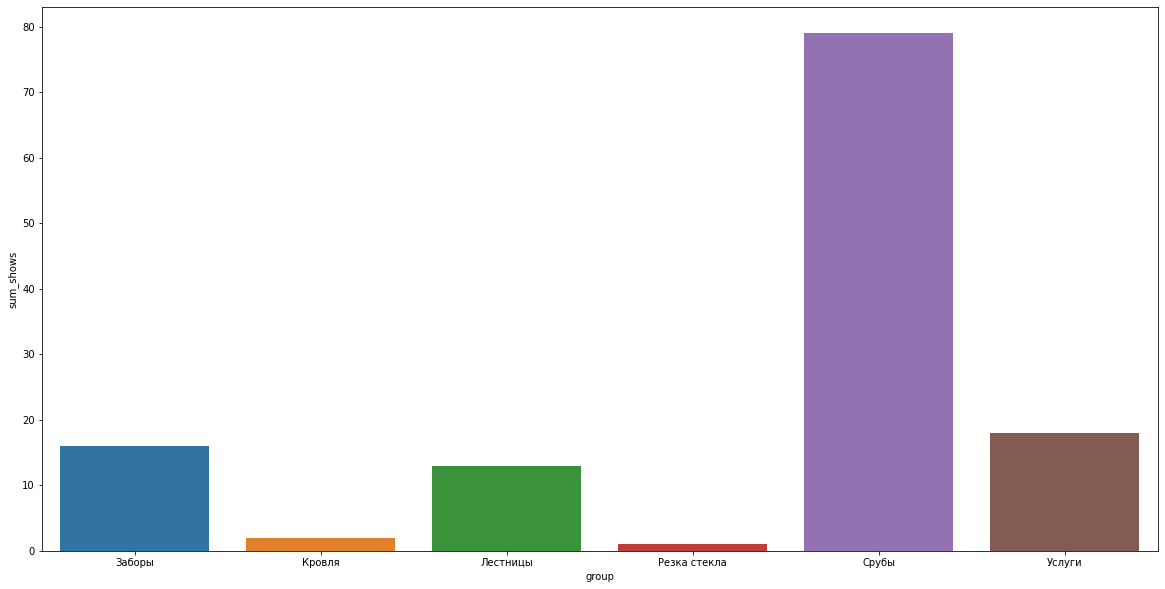

In [249]:
plt.figure(figsize=(20, 10))
sns.barplot(x="group", y="sum_shows", data=popular_query)

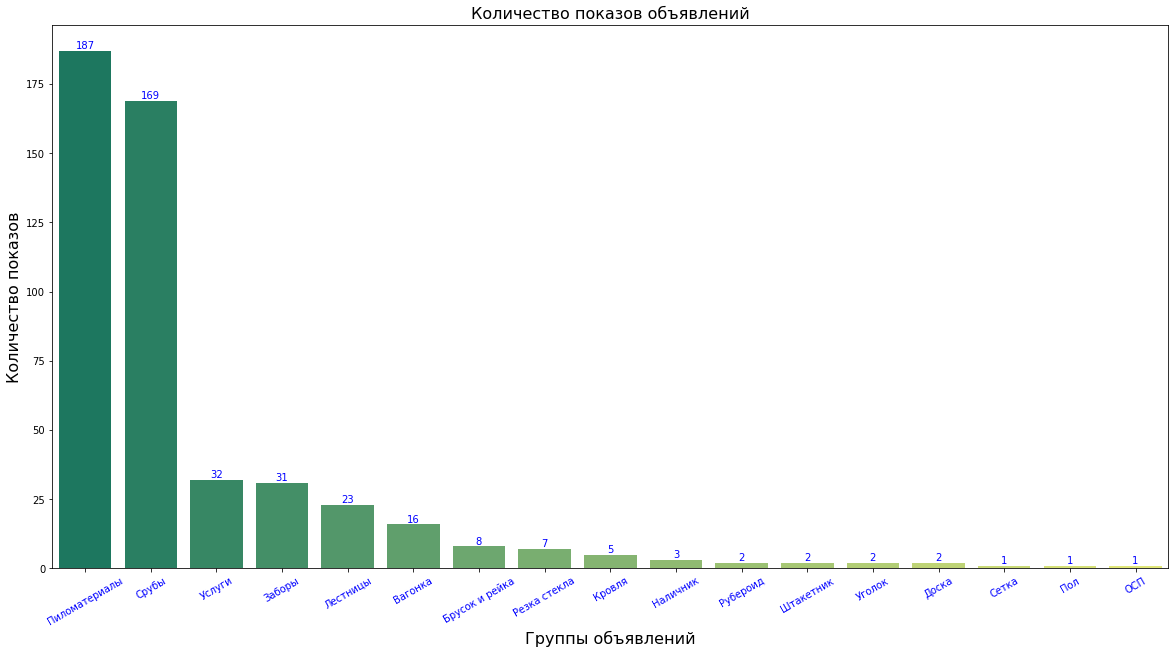

In [96]:
# Гистограмма 'Количество показов объявлений' 20.12.21
popular_query = search.dropna().query("shows > 0").sort_values('shows', ascending=False)
plt.figure(figsize=(20, 10))
plt.title('Количество показов объявлений', fontsize=16)
ax_shows=sns.barplot(x='group', 
            y='shows', 
            data=popular_query, 
            palette='summer')
ax_shows.set_xlabel('Группы объявлений', fontsize=16)
ax_shows.set_ylabel('Количество показов', fontsize=16)
ax_shows.set_xticklabels(popular_query.group,
                  fontsize = 10, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 30,    #  Поворот текста
                   verticalalignment =  'top')    #  Вертикальное выравнивание
# annotation here
for p in ax_shows.patches:
             ax_shows.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='b', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

In [97]:
# Гистограмма 'Количество показов объявлений' 31.12.21
popular_query = popular_query.sort_values('sum_shows', ascending=False)
plt.figure(figsize=(20, 10))
plt.title('Количество показов объявлений', fontsize=16)
ax_shows=sns.barplot(x='group', 
            y='sum_shows', 
            data=popular_query, 
            palette='summer')
ax_shows.set_xlabel('Группы объявлений', fontsize=16)
ax_shows.set_ylabel('Количество показов', fontsize=16)
ax_shows.set_xticklabels(popular_query.group,
                  fontsize = 10, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 30,    #  Поворот текста
                   verticalalignment =  'top')    #  Вертикальное выравнивание
# annotation here
for p in ax_shows.patches:
             ax_shows.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='b', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

KeyError: 'sum_shows'

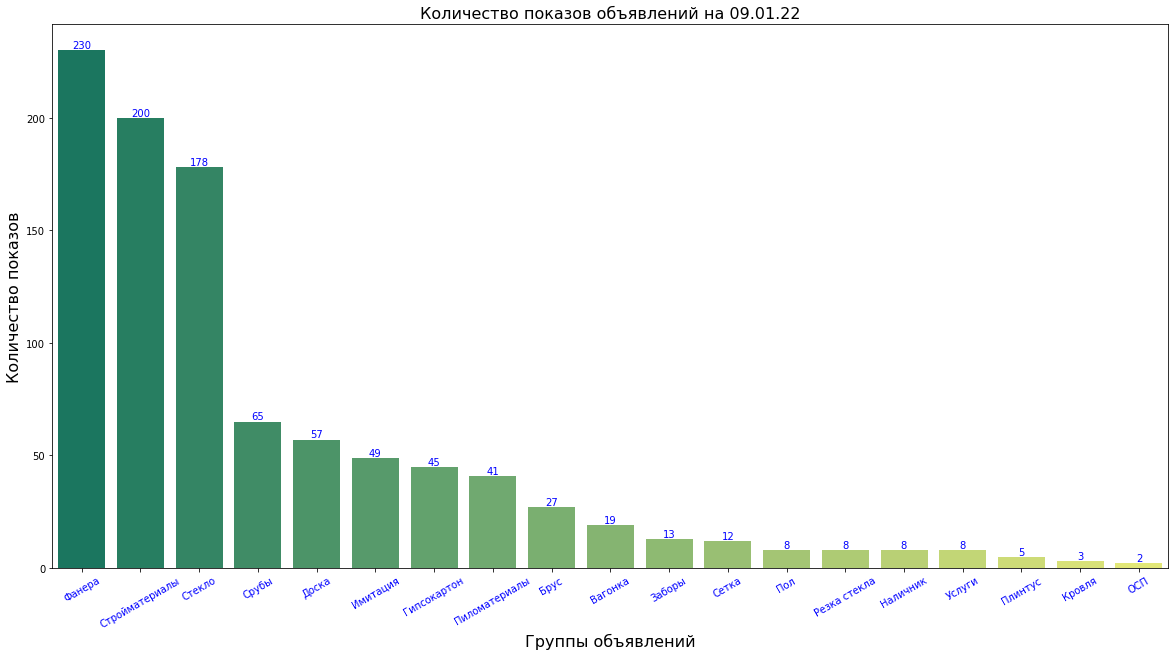

In [216]:
# Гистограмма 'Количество показов объявлений' на 09.01.22
popular_query = popular_query.sort_values('sum_shows', ascending=False)
fig = plt.figure(figsize=(20, 10))
plt.title('Количество показов объявлений на 09.01.22', fontsize=16)
ax_shows=sns.barplot(x='group', 
            y='sum_shows', 
            data=popular_query, 
            palette='summer')
ax_shows.set_xlabel('Группы объявлений', fontsize=16)
ax_shows.set_ylabel('Количество показов', fontsize=16)
ax_shows.set_xticklabels(popular_query.group,
                  fontsize = 10, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 30,    #  Поворот текста
                   verticalalignment =  'top')    #  Вертикальное выравнивание
# annotation here
for p in ax_shows.patches:
             ax_shows.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='b', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

# fig.savefig('Динамика показов декабрь.png')

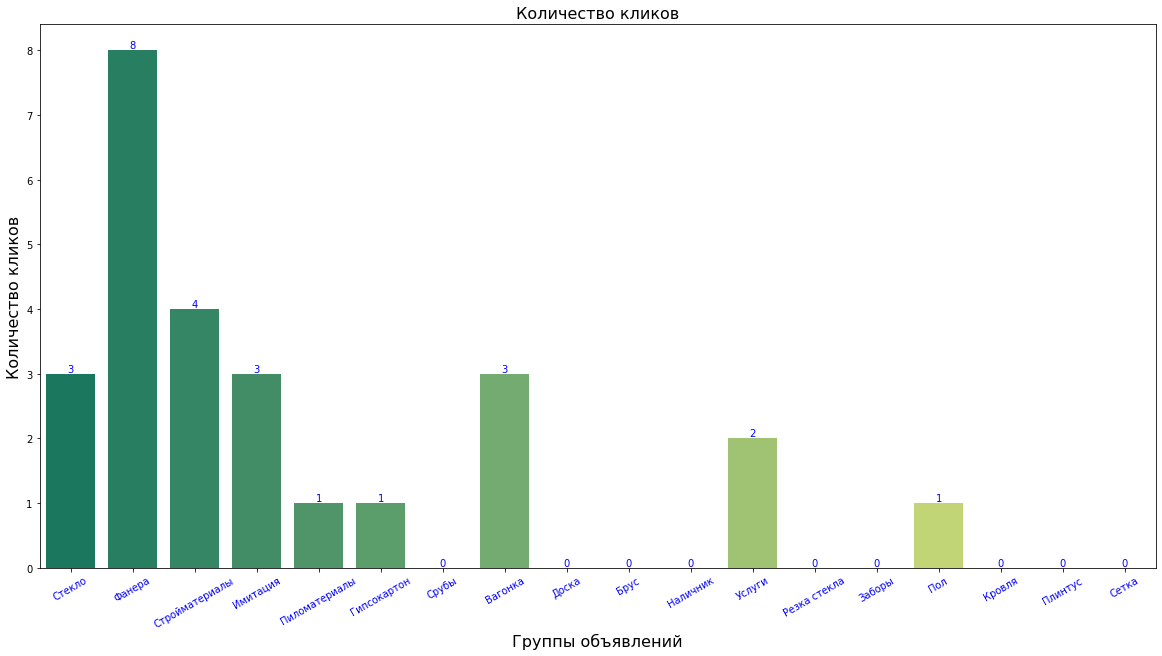

In [88]:
# Гистограмма 'Количество кликов' 20.12.21
popular_query = popular_query.sort_values('sum_shows', ascending=False)
plt.figure(figsize=(20, 10))
plt.title('Количество кликов', fontsize=16)
ax_click=sns.barplot(x='group', 
            y='sum_click', 
            data=popular_query, 
            palette='summer')
ax_click.set_xlabel('Группы объявлений', fontsize=16)
ax_click.set_ylabel('Количество кликов', fontsize=16)
ax_click.set_xticklabels(popular_query.group,
                  fontsize = 10, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 30,    #  Поворот текста
                   verticalalignment =  'top')    #  Вертикальное выравнивание
# annotation here
for p in ax_click.patches:
             ax_click.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='b', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

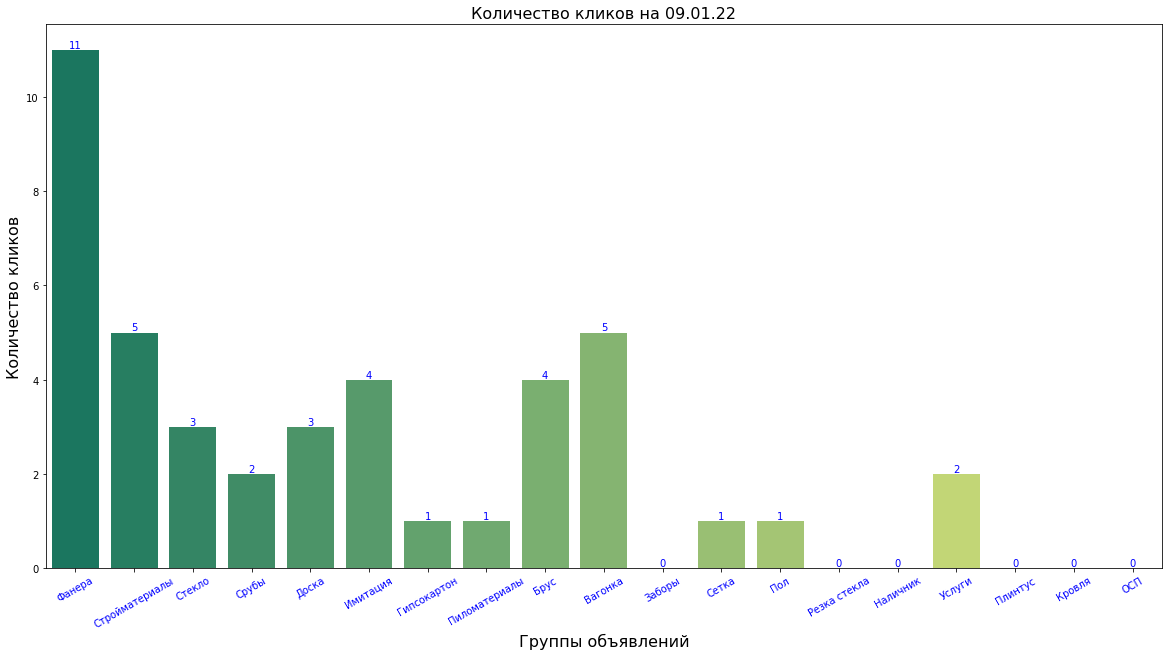

In [152]:
# Гистограмма 'Количество кликов' на 09.01.22
popular_query = popular_query.sort_values('sum_shows', ascending=False)
plt.figure(figsize=(20, 10))
plt.title('Количество кликов на 09.01.22', fontsize=16)
ax_click=sns.barplot(x='group', 
            y='sum_click', 
            data=popular_query, 
            palette='summer')
ax_click.set_xlabel('Группы объявлений', fontsize=16)
ax_click.set_ylabel('Количество кликов', fontsize=16)
ax_click.set_xticklabels(popular_query.group,
                  fontsize = 10, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 30,    #  Поворот текста
                   verticalalignment =  'top')    #  Вертикальное выравнивание
# annotation here
for p in ax_click.patches:
             ax_click.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='b', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

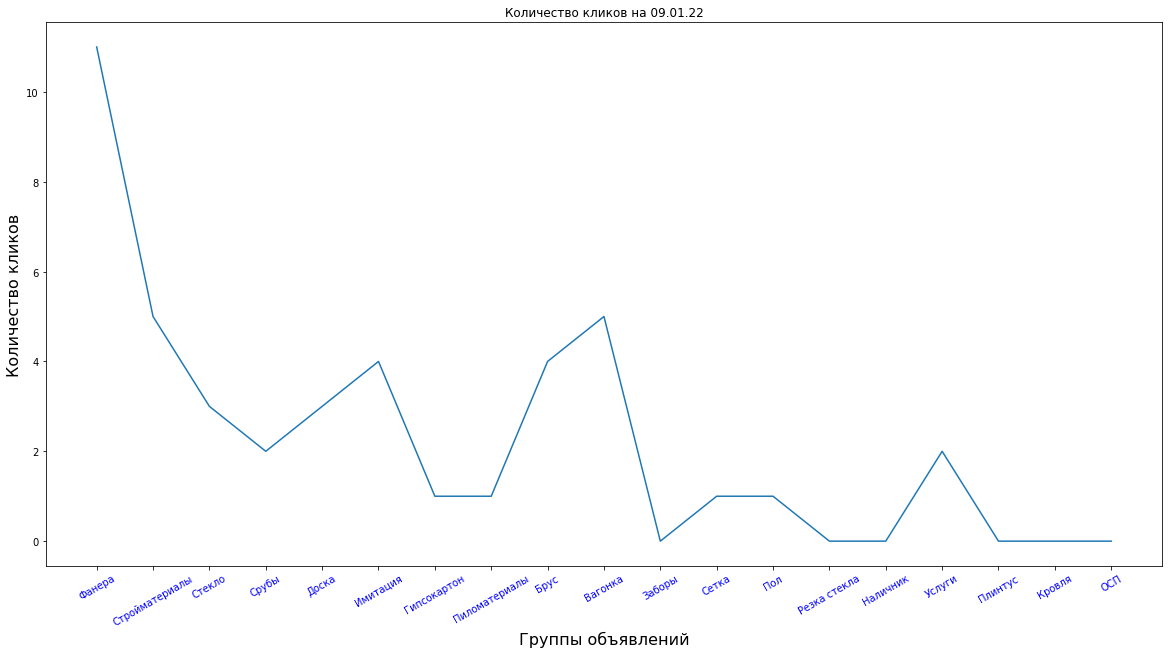

In [153]:
# Line 'Количество кликов' на 09.01.22
popular_query = popular_query.sort_values('sum_shows', ascending=False)
plt.figure(figsize=(20, 10))
plt.title('Количество кликов на 09.01.22')
ax_line = sns.lineplot(x='group', 
            y='sum_click', 
            data=popular_query, 
            sort=False)
ax_line.set_xlabel('Группы объявлений', fontsize=16)
ax_line.set_ylabel('Количество кликов', fontsize=16)
ax_line.set_xticklabels(popular_query.group,
                  fontsize = 10, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 30,    #  Поворот текста
                   verticalalignment =  'top')    #  Вертикальное выравнивание
# annotation here
for p in ax_line.patches:
             ax_line.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='b', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

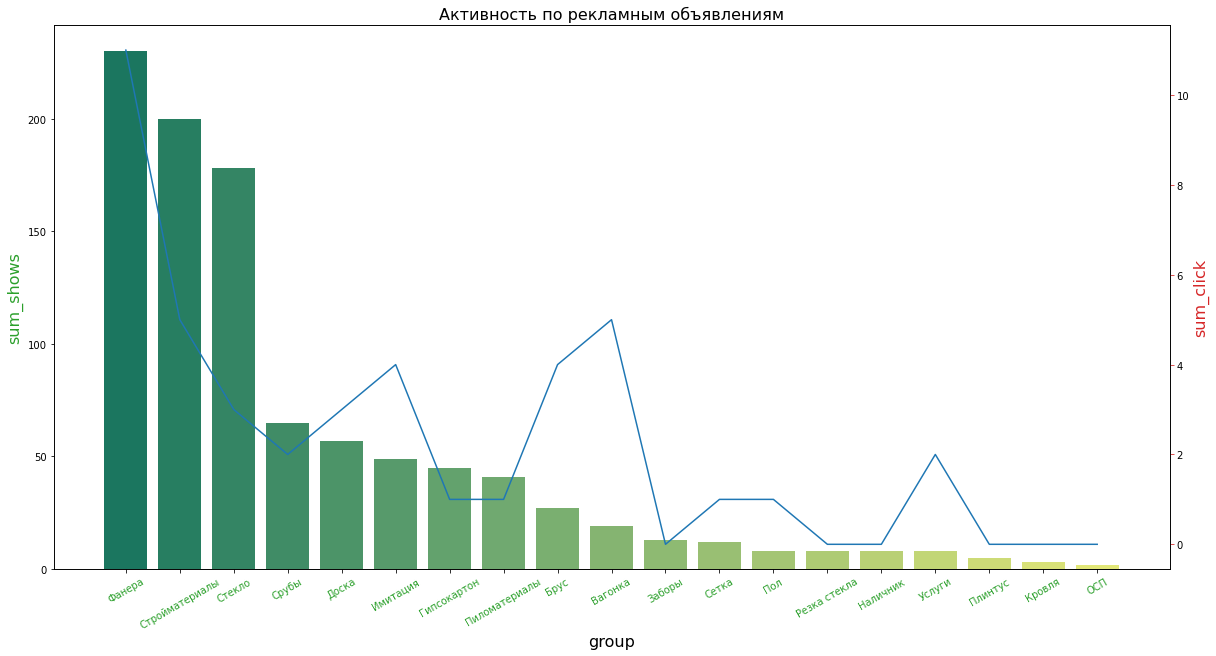

In [154]:
# Нарисуйте базовый слой
popular_query = popular_query.sort_values('sum_shows', ascending=False)
#plt.figure(figsize=(20, 10))
fig, ax_shows = plt.subplots(figsize=(20,10))
ax_shows.set_title('Активность по рекламным объявлениям', fontsize=16)

# Первая гистограмма
color = 'tab:green'
ax_shows.set_xlabel('Группы объявлений', fontsize=16)
ax_shows.set_ylabel('Количество показов', fontsize=16, color=color)
ax_shows = sns.barplot(x='group', 
            y='sum_shows', 
            data=popular_query, 
            palette='summer')
ax_shows.set_xticklabels(popular_query.group,
                  fontsize = 10, # horizontal
                   color=color,    #  Цвет текста
                   rotation = 30,    #  Поворот текста
                   verticalalignment =  'top')    #  Вертикальное выравнивание
ax_shows.tick_params(axis='y')
 #twinxShare x-axis (Схожий синтаксис, например совместное использование оси y twiny)
ax_line = ax_shows.twinx()


# Второй график, линейный график
color = 'tab:red'
ax_line.set_ylabel('Количество кликов', fontsize=16, color=color)
ax_line = sns.lineplot(x='group', 
            y='sum_click', 
            data=popular_query, 
            sort=False)
ax_line.tick_params(axis='y', color=color)

# Отображение результатов рисования
plt.show()

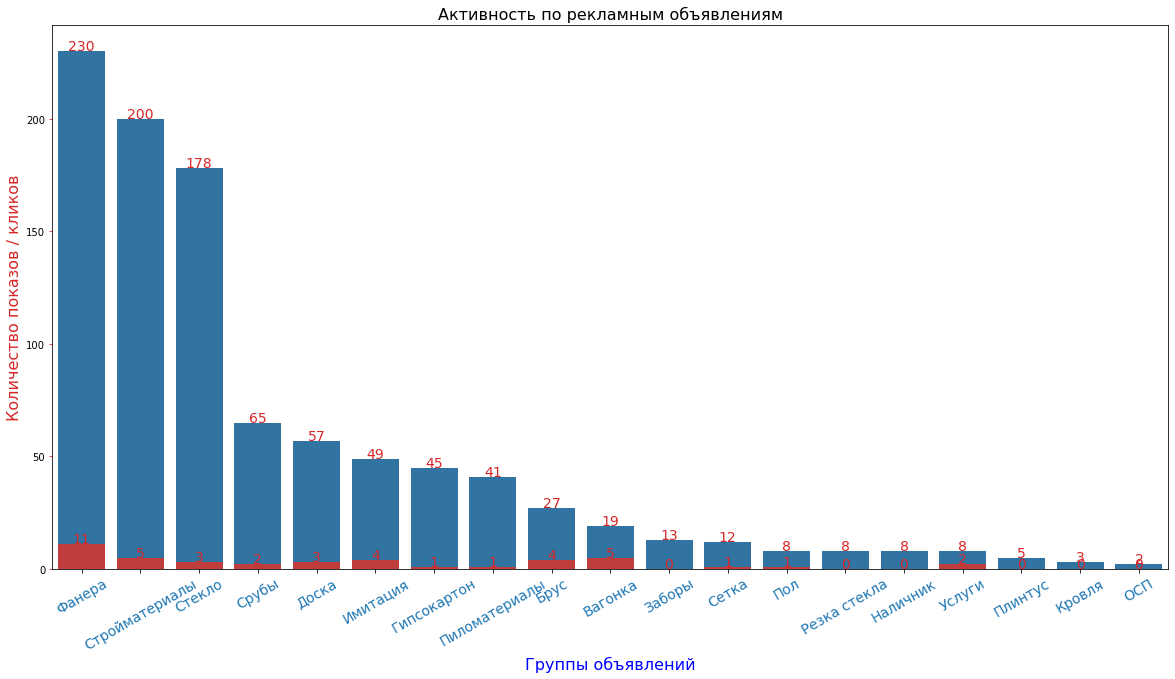

In [155]:
# Нарисуйте базовый слой
popular_query = popular_query.sort_values('sum_shows', ascending=False)
fig, ax_shows = plt.subplots(figsize=(20,10))
#plt.figure(figsize=(20, 10))
ax_shows.set_title('Активность по рекламным объявлениям', fontsize=16)

# Первая гистограмма
color = 'tab:blue'
ax_shows.set_xlabel('Группы объявлений', fontsize=16)
ax_shows=sns.barplot(x='group', 
            y='sum_shows', 
            data=popular_query, 
            color=color)
ax_shows.set_ylabel('Количество показов', fontsize=16, color=color)
ax_shows.set_xticklabels(popular_query.group,
                  fontsize = 14, # horizontal
                   color=color,    #  Цвет текста
                   rotation = 30,    #  Поворот текста
                   verticalalignment =  'top')    #  Вертикальное выравнивание
ax_shows.tick_params(axis='y')
 #twinxShare x-axis (Схожий синтаксис, например совместное использование оси y twiny)
#ax_click = ax_shows.twinx()

# annotation here
# for p in ax_shows.patches:
#              ax_shows.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
#                  ha='center', va='center', fontsize=14, color=color, xytext=(0, 5),
#                  textcoords='offset points')


# Вторая гистограмма
color = 'tab:red'
ax_click=sns.barplot(x='group', 
            y='sum_click', 
            data=popular_query, 
            color=color)
ax_click.set_ylabel('Количество показов / кликов', fontsize=16, color=color)
ax_click.set_xlabel('Группы объявлений', fontsize=16, color='blue')
# ax_click.set_ylabel('Количество кликов', fontsize=16)
ax_click.tick_params(axis='y', color=color)

# annotation here
for p in ax_click.patches:
             ax_click.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=14, color=color, xytext=(0, 5),
                 textcoords='offset points')

# Отображение результатов рисования
plt.show()

# ax_shows = sns.barplot(x = 'group', y = 'sum_shows', data = popular_query, color = 'red')
# ax_click = sns.barplot(x = 'group', y = 'sum_click', data = popular_query, color = 'blue')

In [ ]:
# ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
# ax.set(xlabel='Driver score', ylabel='Percentage')
# sns.despine()  # убрать часть рамки графика
# plt.show()

# plt.figure(figsize=(20, 10))
# sns.barplot(x="group", y="sum_shows", data=popular_query)

In [ ]:
#df.groupby(['Id']).median().sort_values("Speed").plot.bar()

In [286]:
# plt.figure(figsize=(20, 10))
# ax = sns.barplot(x="group", y="sum_shows", data=popular_query, orient="h")
#ax.fig.autofmt_xdate()

In [ ]:
# ORIGIN
def sortedgroupedbar(ax, x,y, groupby, data=None, width=0.8, **kwargs):
    order = np.zeros(len(data))
    df = data.copy()
    for xi in np.unique(df[x].values):
        group = data[df[x] == xi]
        a = group[y].values
        b = sorted(np.arange(len(a)),key=lambda x:a[x],reverse=True)
        c = sorted(np.arange(len(a)),key=lambda x:b[x])
        order[data[x] == xi] = c   
    df["order"] = order
    u, df["ind"] = np.unique(df[x].values, return_inverse=True)
    step = width/len(np.unique(df[groupby].values))
    for xi,grp in df.groupby(groupby):
        ax.bar(grp["ind"]-width/2.+grp["order"]*step+step/2.,
               grp[y],width=step, label=xi, **kwargs)
    ax.legend(title=groupby)
    ax.set_xticks(np.arange(len(u)))
    ax.set_xticklabels(u)
    ax.set_xlabel(x)
    ax.set_ylabel(y)


fig, ax = plt.subplots()    
sortedgroupedbar(ax, x="Class",y="Percentage", groupby="Age", data=df)
plt.show()


In [292]:
def sortedgroupedbar(ax, x,y, groupby, data=None, width=0.8, **kwargs):
    order = np.zeros(len(data))
    df = data.copy()
    for xi in np.unique(df[x].values):
        group = data[df[x] == xi]
        a = group[y].values
        b = sorted(np.arange(len(a)),key=lambda x:a[x],reverse=True)
        c = sorted(np.arange(len(a)),key=lambda x:b[x])
        order[data[x] == xi] = c   
    df["order"] = order
    u, df["ind"] = np.unique(df[x].values, return_inverse=True)
    step = width/len(np.unique(df[groupby].values))
    for xi,grp in df.groupby(groupby):
        ax.bar(grp["ind"]-width/2.+grp["order"]*step+step/2.,
               grp[y],width=step, label=xi, **kwargs)
    ax.legend(title=groupby)
    ax.set_xticks(np.arange(len(u)))
    ax.set_xticklabels(u)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

In [ ]:
# fig, ax = plt.subplots()    
# sortedgroupedbar(ax, x="sum_shows", y="sum_click", groupby="group", data=popular_query)
# plt.show()

In [ ]:
# fig, ax = plt.subplots()    
# sortedgroupedbar(ax, x="sum_shows", y="sum_click", groupby="group", data=popular_query)
# plt.show()

In [ ]:
# ORIGIN
# Вы должны передать значения от x= до order= . В твоем случае я бы так и сделал:

death = pd.read_csv('https://storage.googleapis.com/hewwo/NCHS_-_Leading_Causes_of_Death__United_States.csv', sep=',', header=0)

plot_order = death.groupby('Cause Name')['Deaths'].sum().sort_values(ascending=False).index.values

sns.catplot(data=death, x='Cause Name',  y='Deaths',kind='bar',ci=None, legend_out=False, order=plot_order)

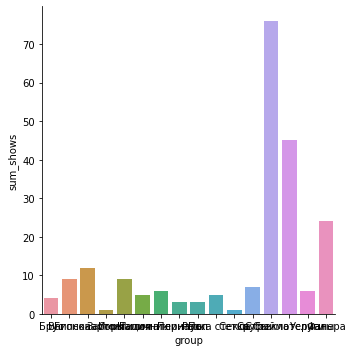

In [318]:
#plot_order = popular_query.sort_values('sum_shows', ascending=False)

sns.catplot(data=popular_query, x='group', y='sum_shows', kind='bar', ci=None, legend_out=False, order=popular_query.group)

In [156]:
#labels = ['Контрольная\nгруппа № %i' % i for i in range(1, 6)]
#value = (12, 24, 18, 11, 6)
# position = np.arange(5)


# ax = plt.subplots(x="group", y="sum_shows", data=popular_query)
# #fig, ax = plt.subplots()

# #ax.barh(position, value) # vertical
# ax.bar(popular_query.sum_shows) # horizontal

# #  Устанавливаем позиции тиков:
# #ax.set_yticks(position) # vertical
# ax.set_xticks() # horizontal

# #  Устанавливаем подписи тиков
# #ax.set_yticklabels(labels,
# #                   fontsize = 15) # vertical
# ax.set_xticklabels(popular_query.group,
#                   fontsize = 15, # horizontal
#                    color = 'b',    #  Цвет текста
#                    rotation = 45,    #  Поворот текста
#                    verticalalignment =  'top')    #  Вертикальное выравнивание

# plt.figure(figsize=(20, 10))
# # fig.set_figwidth(10)
# # fig.set_figheight(6)

# plt.show()



In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x="group", y="sum_shows", data=popular_query)

In [ ]:
# ORIGIN
# Или, если вы хотите удалить панель "All causes":

sns.catplot(data=death, x='Cause Name',  y='Deaths',kind='bar',ci=None, legend_out=False, order=plot_order[1:])

In [ ]:
sns.catplot(data=death, x='Cause Name',  y='Deaths',kind='bar',ci=None, legend_out=False, order=plot_order[1:])

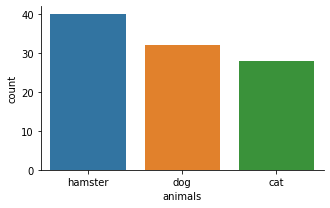

In [295]:
# ORIGIN
# Вы можете установить order аргумент sns.catplot() в предпочтительном порядке.
# Вы можете использовать df['col'].value_counts().index , чтобы получить этот заказ.

a = np.random.choice(['cat', 'dog', 'hamster'], 100)

df = pd.DataFrame(a, columns=['animals'])

sns.catplot(data=df, x='animals',kind='count',ci=None,legend_out=False,
            height=3, aspect=1.5, order=df['animals'].value_counts().index)

In [305]:
#sns.catplot(data=popular_query, x='group', y='sum_shows', kind='count', ci=None, legend_out=False,
#            height=3, aspect=1.5, order=popular_query['group'].value_counts().index)